In [1]:
import pandas as pd

In [2]:
#read train dataset
df_train = pd.read_csv(r'/Users/aakanksha/Downloads/data_science_honors 2/data/titanic/train.csv')

In [3]:
#dataset has 891 rows and 12 cols
df_train.shape

(891, 12)

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Column desc
1) Survived- Survival 0 = No, 1 = Yes
2) Pclass- A proxy for socio-economic status (SES) 1st = Upper , 2nd = Middle ,3rd = Lower
3) Name - Name
4) Sex - Sex
5) Age - Age in Years
6) SibSp - Number of Siblings/Spouses Aboard
7) Parch - Number of Parents/Children Aboard
8) Ticket - Ticket Number
9) Fare - Passenger Fare
10) Cabin - Cabin number
11) Embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
#first 5 entries of DataSet
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#checking for null values and data type of columns 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#null values in columns
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Dropping columns 
cols=['PassengerId','Name','Ticket','Cabin']
df_train = df_train.drop(cols,axis=1)

In [9]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [10]:
#finding number of null values 
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
#fill missing Age values
df_train['Age']=df_train['Age'].interpolate()

In [12]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
#converting Pclass,Sex,Embarked to dummy variables
#categorical to dummies
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df_train[col]))

In [14]:
titanic_dummies = pd.concat(dummies, axis=1)

In [15]:
#final dataset
df = pd.concat((df_train,titanic_dummies), axis=1)

In [16]:
#drop orignal comuns from dataset
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [18]:
# predict the probability of a survival
# of a person based on gender, age and passenger-class
cols = ['SibSp','Parch','Fare','C','Q','S',]
df = df.drop(cols,axis=1)

In [19]:
df.columns

Index(['Survived', 'Age', 1, 2, 3, 'female', 'male'], dtype='object')

In [20]:
#seprating out target and factor attributes
X = df.values
y = df['Survived'].values

In [21]:
import numpy as np
X = np.delete(X,1,axis=1)

In [23]:
#dividing into train and test state
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv(r'/Users/aakanksha/Downloads/data_science_honors 2/data/titanic/train.csv')

In [27]:
print(df.columns)
df['Age']=df['Age'].interpolate()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [28]:
df.dropna(inplace=True)

In [29]:
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 93.6842105263158
Percentage of males who survived: 42.05607476635514


In [30]:
#from age to category 
def get_who(row):
    # print(row, type(row))
    str_who = ""
    age = row['Age']
    gender = row['Sex']
    if 0<age<=12:
        str_who += 'child'
    elif 12<age<=50:
        str_who +=  'adult'
    elif 50<age:
        str_who +=  'senior'
    
    str_who += '_' + gender
    return str_who

In [31]:
df['who'] = df.apply(lambda row: get_who(row), axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult_female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,senior_male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child_female
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,senior_female


In [32]:
print("Percentage of females children who survived:", df["Survived"][df["who"] == 'child_female'].value_counts(normalize = True)[1]*100)

print("Percentage of males children who survived:", df["Survived"][df["who"] == 'child_male'].value_counts(normalize = True)[1]*100)

Percentage of females children who survived: 50.0
Percentage of males children who survived: 87.5


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


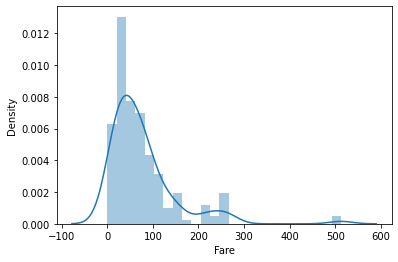

In [33]:
sns.distplot(df['Fare']);

Percentage of Pclass = 1 who survived: 66.0919540229885
Percentage of Pclass = 2 who survived: 81.25
Percentage of Pclass = 3 who survived: 50.0


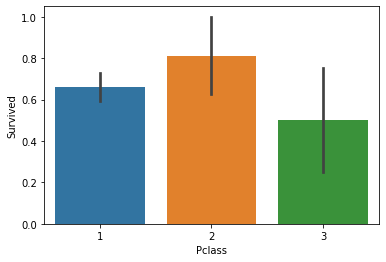

In [35]:
sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 60.483870967741936
Percentage of SibSp = 1 who survived: 75.36231884057972
Percentage of SibSp = 2 who survived: 83.33333333333334


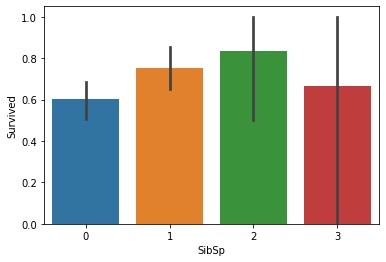

In [36]:
# bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df)

print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

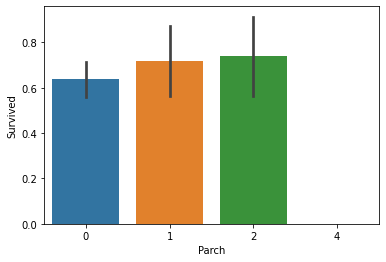

In [37]:
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()